In [56]:
#importing dependencies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# feature engineering
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize 
nltk.download('vader_lexicon')

# visualizations
import seaborn as sns

# scikit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# reading the dataset
personality_data = pd.read_csv("../data/mbti_1.csv")

In [3]:
# lookign at the top 5 rows of the dataset
personality_data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
# checking the number of rows and columns
personality_data.shape

(8675, 2)

#### Each row as 50 posts. Splitting these posts into their own row.

In [5]:
# splitting rows - one row for each post
personality_data = pd.concat([pd.Series(row["type"], row["posts"].split("|||"))              
                                for _, row in personality_data.iterrows()]).reset_index().rename({"index": "posts", 0: "type"}, axis=1)

In [6]:
# checking the number of rows and columns again
personality_data.shape

(422845, 2)

Splitting of each row into 50 rows has added a lot more data to our dataset.

In [7]:
personality_data.head()

,posts,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw,INFJ
1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,INFJ
2,enfp and intj moments https://www.youtube.com...,INFJ
3,What has been the most life-changing experienc...,INFJ
4,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,INFJ


#### Checking for Null values

In [8]:
# checking for missing values
personality_data.isnull().sum()

posts    0
type     0
dtype: int64

Luckily there are no missing values present in this dataset.

#### Checking for Class Imbalance

In [9]:
# checking number of records for each of the 16 personality types
personality_data["type"].value_counts()

INFP    89796
INFJ    72105
INTP    63359
INTJ    52471
ENTP    33761
ENFP    32769
ISTP    16498
ISFP    13000
ENTJ    11273
ISTJ     9913
ENFJ     9288
ISFJ     8121
ESTP     4337
ESFP     2215
ESFJ     2018
ESTJ     1921
Name: type, dtype: int64

The dataset seems to be Imbalanced.

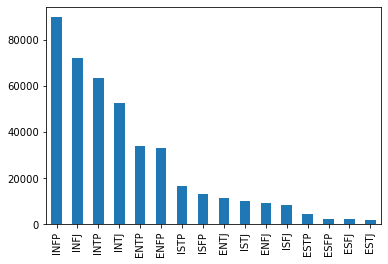

In [10]:
# visually showing the class imbalance
personality_data["type"].value_counts().plot(kind="bar")

In [11]:
# fixing the class imbalance but converting 16 classes into 4 more balanced classes
personality_data['is_Extrovert'] = personality_data['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
personality_data['is_Sensing'] = personality_data['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
personality_data['is_Thinking'] = personality_data['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
personality_data['is_Judging'] = personality_data['type'].apply(lambda x: 1 if x[3] == 'J' else 0)
personality_data.head()

,posts,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,'http://www.youtube.com/watch?v=qsXHcwe3krw,INFJ,0,0,0,1
1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,INFJ,0,0,0,1
2,enfp and intj moments https://www.youtube.com...,INFJ,0,0,0,1
3,What has been the most life-changing experienc...,INFJ,0,0,0,1
4,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,INFJ,0,0,0,1


In [12]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [13]:
# printing all the counts
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 325263
Extrovert Count: 97582
Intuition Count: 364822
Sensing Count: 58023
Feeling Count: 229312
Thinking Count: 193533
Perceiving Count: 255735
Judging Count: 167110


The class imbalance issue still seem to exist but the data now looks much better than the minority class counts of previous data.

#### Checking for presence of correlations

In [14]:
corr = personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]].corr()
corr.style.background_gradient(cmap='BrBG').set_precision(4)

,is_Extrovert,is_Sensing,is_Thinking,is_Judging
is_Extrovert,1.0000,-0.0473,0.0747,-0.1615
is_Sensing,-0.0473,1.0000,0.0843,-0.0135
is_Thinking,0.0747,0.0843,1.0000,-0.0088
is_Judging,-0.1615,-0.0135,-0.0088,1.0000


There does not seem to be any strong correlation between the four personality dimenions.

### Feature Engineering

#### Data Cleaning

In [15]:
# replacing urls with domain name
personality_data["clean_posts"] = personality_data["posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+).*"),
    lambda match: match.group(2)
    )

In [16]:
# replacing emails with space
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\S+@\S+"), " "
    )

In [17]:
# converting posts into lower case
personality_data["clean_posts"] = personality_data["clean_posts"].str.lower()

In [18]:
# replacing MBTIs with space
mbti = ["INFP", "INFJ", "INTP", "INTJ", "ENTP", "enfp", "ISTP", "ISFP", "ENTJ", "ISTJ", "ENFJ", "ISFJ", "ESTP", "ESFP", "ESFJ", "ESTJ"]

for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), " ")
#     personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
#         type_word, " ")

#### Question/Exclamation/Colon/Emoji Count

In [19]:
def unique_words(s):
    unique = set(s.split(' ')) 
    return len(unique)

def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if 'http' not in e:
            if e.count(':')==2:
                emoji_count+=1
    return emoji_count

def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if 'http' not in e:
            colon_count+=e.count(':')
    return colon_count

In [20]:
personality_data["qm"] = personality_data["posts"].apply(lambda s : s.count("?"))
personality_data["em"] = personality_data["posts"].apply(lambda s : s.count("!"))
personality_data["colons"] = personality_data["posts"].apply(colons)
personality_data["emojis"] = personality_data["posts"].apply(emojis)

#### Word Count

In [21]:
personality_data["word_count"] = personality_data["posts"].apply(lambda s : s.count(" ") + 1)
personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

#### Upper Case Count

In [22]:
personality_data["upper"] = personality_data["posts"].apply(lambda x: len(
                        [x for x in x.split() if x.isupper()]))

#### Link Count

In [23]:
# counting links per post
personality_data["link_count"] = personality_data["posts"].apply(lambda s : s.count("http"))

#### Ellipses Count

In [24]:
# counting ellipses per post 
ellipses_count = [len(re.findall(r'\.\.\.\ ', posts)) for posts in personality_data["posts"]]
personality_data['ellipses'] = ellipses_count

#### Image Count

In [25]:
# counting images per post 
personality_data["img_count"] = [len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post))
                  for post in personality_data["posts"]]

In [26]:
personality_data.head(2)

,posts,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,clean_posts,qm,em,colons,emojis,word_count,unique_words,Upper,link_count,ellipses,img_count
0,'http://www.youtube.com/watch?v=qsXHcwe3krw,INFJ,0,0,0,1,'youtube,1,0,0,0,1,1,0,1,0,0
1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,INFJ,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1


#### Dropping posts with less than 3 words

In [27]:
personality_data.drop(personality_data[personality_data["word_count"] < 3].index, inplace=True)

In [28]:
personality_data.reset_index(drop=True, inplace=True)

In [29]:
personality_data.head(2)

,posts,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,clean_posts,qm,em,colons,emojis,word_count,unique_words,Upper,link_count,ellipses,img_count
0,enfp and intj moments https://www.youtube.com...,INFJ,0,0,0,1,and moments youtube,2,0,0,0,16,13,0,2,0,0
1,What has been the most life-changing experienc...,INFJ,0,0,0,1,what has been the most life-changing experienc...,1,0,0,0,10,10,0,0,0,0


#### Sentiments Analysis Score

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

nlp_sentiment_score = []

for post in personality_data["clean_posts"]:
    score = analyzer.polarity_scores(post)
    nlp_sentiment_score.append(score)

In [32]:
personality_data["compound_sentiment_score"] = [score["compound"] for score in nlp_sentiment_score]
personality_data["pos_sentiment_score"] = [score["pos"] for score in nlp_sentiment_score]
personality_data["neg_sentiment_score"] = [score["neg"] for score in nlp_sentiment_score]
personality_data["neu_sentiment_score"] = [score["neu"] for score in nlp_sentiment_score]

In [33]:
personality_data.head(2)

,posts,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,clean_posts,qm,em,colons,...,word_count,unique_words,Upper,link_count,ellipses,img_count,compound_sentiment_score,pos_sentiment_score,neg_sentiment_score,neu_sentiment_score
0,enfp and intj moments https://www.youtube.com...,INFJ,0,0,0,1,and moments youtube,2,0,0,...,16,13,0,2,0,0,0.0,0.0,0.0,1.0
1,What has been the most life-changing experienc...,INFJ,0,0,0,1,what has been the most life-changing experienc...,1,0,0,...,10,10,0,0,0,0,0.0,0.0,0.0,1.0


#### Grammar Tagging

In [34]:
# tagging grammar in the words
# stop_words = set(stopwords.words('english')) 
# tokenized = sent_tokenize(str(personality_data["clean_posts"])) 

# for row in personality_data["clean_posts"]:
#     tokenized = sent_tokenize(str(personality_data["clean_posts"])) 
#     wordsList = nltk.word_tokenize(str(tokenized))
#     wordsList = [w for w in wordsList if w.isalpha() and not w in stop_words]
#     tagged = nltk.pos_tag(wordsList) 
#     print(tagged)
    
    
# for i in tokenized: 
      
#     # Word tokenizers is used to find the words and punctuation in a string 
#     wordsList = nltk.word_tokenize(i) 
  
#     # removing stop words and punctuations from wordList 
#     wordsList = [w for w in wordsList if w.isalpha() and not w in stop_words]  
  
#     #  Using a Tagger which is part-of-speech tagger or POS-tagger  
#     tagged = nltk.pos_tag(wordsList) 
  
#     print(tagged) 

In [35]:
# part of speech tagging 
# personality_data["pos_tag"] = personality_data["clean_posts"].apply(
#                                 lambda x: [nltk.pos_tag(word_tokenize(row)) for row in x])
# personality_data['tagged_words'][0]

In [36]:
# from nltk.tag.perceptron import PerceptronTagger
# tagger = PerceptronTagger()

# personality_data["pos_tag"] = personality_data["clean_posts"].apply(
#                                 lambda x: [tagger.tag(word_tokenize(row)) for row in x])

In [37]:
# personality_data.head()

In [38]:
# combining similar pos into one category based on the Stanford POS tags 
# tag_dict={'ADJ':['JJ','JJR','JJS'], 'ADP':['EX','TO'], 'ADV':['RB','RBR','RBS','WRB'], 'CONJ':['CC','IN'],'DET':['DT','PDT','WDT'],
#               'NOUN':['NN','NNS','NNP','NNPS'], 'NUM':['CD'],'PRT':['RP'],'PRON':['PRP','PRP$','WP','WP$'],
#               'VERB':['MD','VB','VBD','VBG','VBN','VBP','VBZ'],'.':['#','$',"''",'(',')',',','.',':'],'X':['FW','LS','UH']}

# for word,tag in personality_data["pos_tag"]:
#     for key,value in tag_dict.items():
#         if tag in value:
#             tag = key

In [39]:
# personality_data["adj_count"] = 

### Visualizations

#### Word Clouds

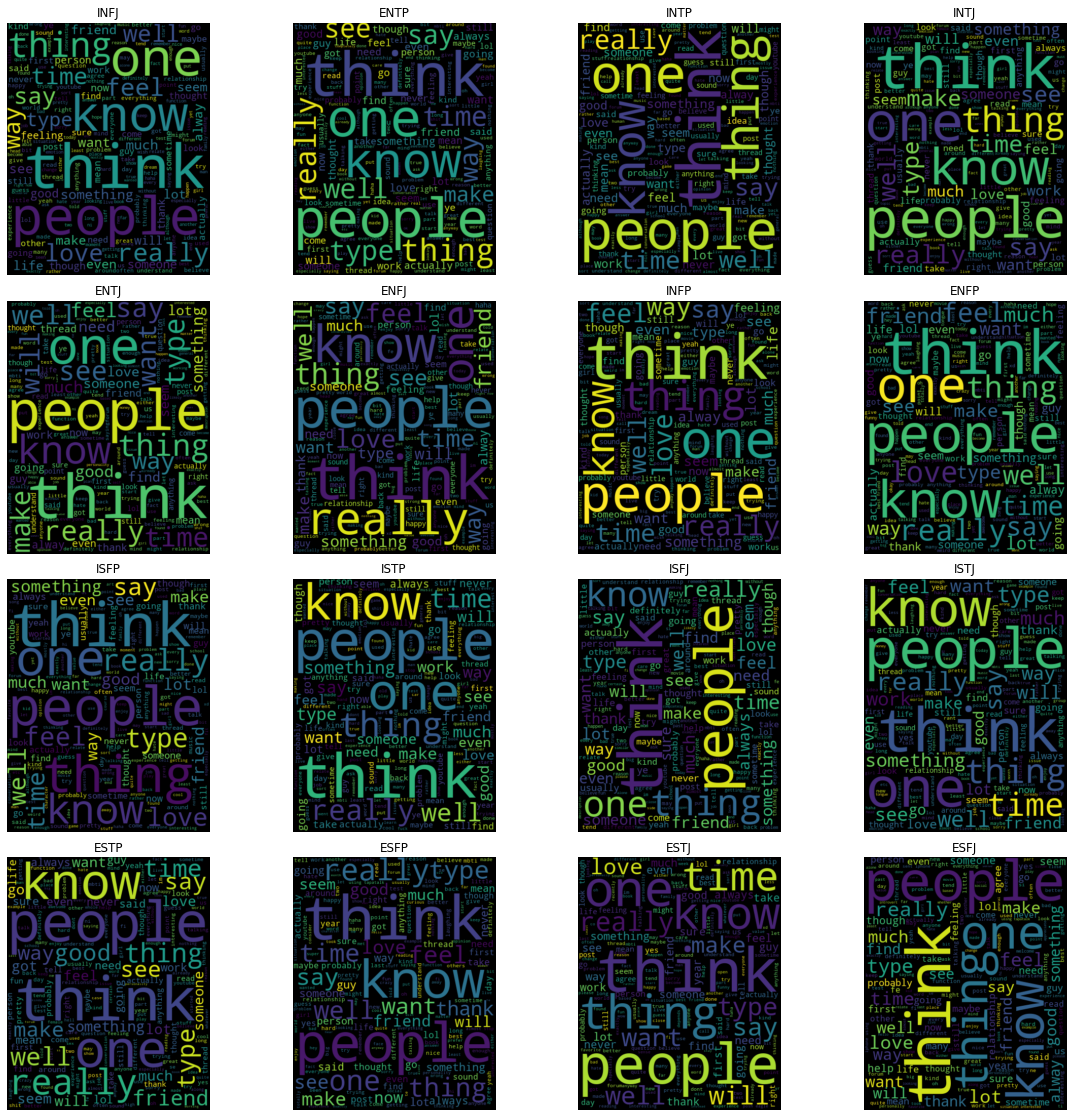

In [40]:
from wordcloud import WordCloud

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace = .1, wspace=.1)
ax = ax.ravel()

for i, mbti_type in enumerate(personality_data["type"].unique()):
        wordcloud_words = " ".join(personality_data[personality_data["type"]==mbti_type]["clean_posts"])
        wordcloud = WordCloud(height=500).generate(wordcloud_words)
        ax[i].imshow(wordcloud, interpolation = 'bilinear')
        ax[i].axis("off")
        ax[i].set_title(mbti_type)

#### Word Count by Type

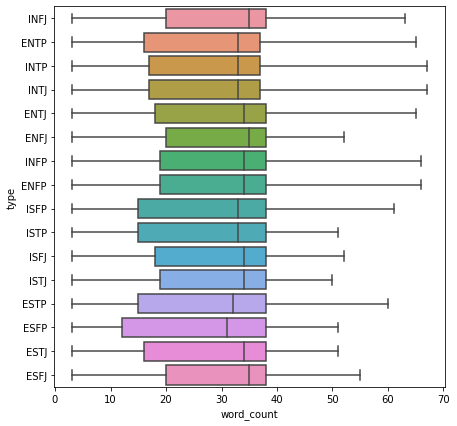

In [41]:
# boxplot of word counts
plt.figure(figsize=(7,7))
sns.boxplot(y="type", x="word_count", data=personality_data, showfliers=False)

#### Compound Sentiment Score by Type

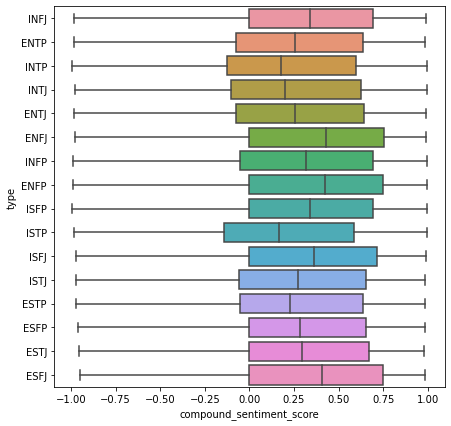

In [42]:
plt.figure(figsize=(7,7))
sns.boxplot(y="type", x="compound_sentiment_score", data=personality_data, showfliers=False)

#### Positive Sentiment Score by Type

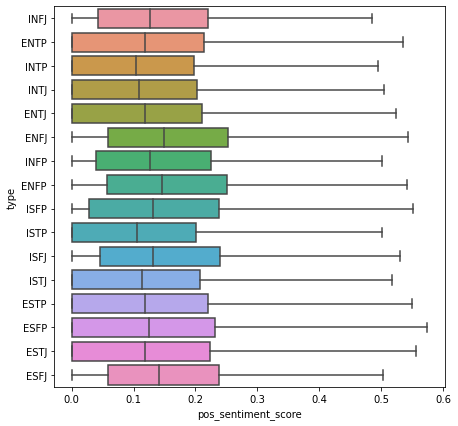

In [43]:
plt.figure(figsize=(7,7))
sns.boxplot(y="type", x="pos_sentiment_score", data=personality_data, showfliers=False)

#### Negative Sentiment Score by Type

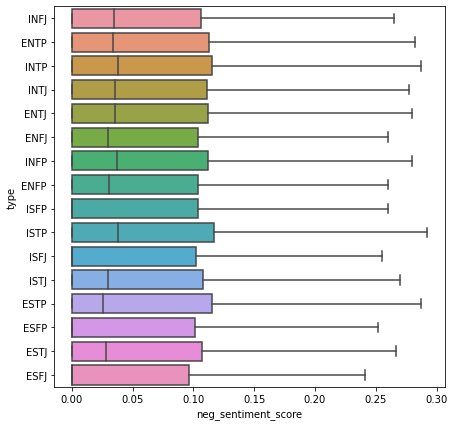

In [44]:
plt.figure(figsize=(7,7))
sns.boxplot(y="type", x="neg_sentiment_score", data=personality_data, showfliers=False)

#### Neutral Sentiment Score by Type

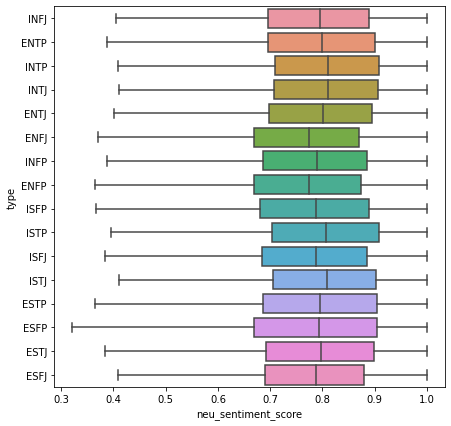

In [45]:
plt.figure(figsize=(7,7))
sns.boxplot(y="type", x="neu_sentiment_score", data=personality_data, showfliers=False)

#### Question Marks by Type

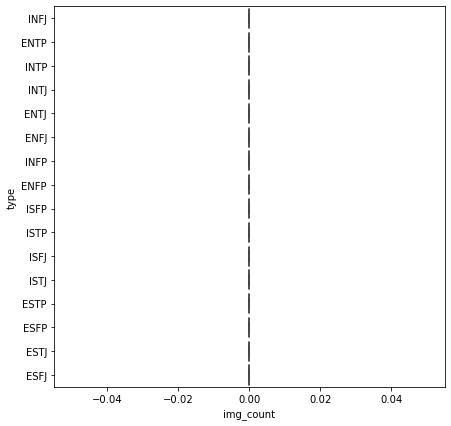

In [46]:
# plt.figure(figsize=(10,5))
# sns.boxplot(y="type", x="emojis", data=personality_data, showfliers=False)
# personality_data.groupby("type")["em"].value_counts()
plt.figure(figsize=(7,7))
sns.boxplot(y="type", x="img_count", data=personality_data, showfliers=False)

In [49]:
# preparing the dataset for modellling
clean_data = personality_data.drop("clean_posts", axis=1)

In [50]:
clean_data.head()

,posts,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,qm,em,colons,emojis,word_count,unique_words,Upper,link_count,ellipses,img_count,compound_sentiment_score,pos_sentiment_score,neg_sentiment_score,neu_sentiment_score
0,enfp and intj moments https://www.youtube.com...,INFJ,0,0,0,1,2,0,0,0,16,13,0,2,0,0,0.0000,0.000,0.000,1.000
1,What has been the most life-changing experienc...,INFJ,0,0,0,1,1,0,0,0,10,10,0,0,0,0,0.0000,0.000,0.000,1.000
2,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,INFJ,0,0,0,1,2,0,0,0,11,9,0,2,0,0,0.0000,0.000,0.000,1.000
3,May the PerC Experience immerse you.,INFJ,0,0,0,1,0,0,0,0,6,6,0,0,0,0,0.0000,0.000,0.000,1.000
4,The last thing my INFJ friend posted on his fa...,INFJ,0,0,0,1,0,0,0,0,22,21,1,1,0,0,0.3612,0.291,0.164,0.545


### Modelling

In [97]:
X = clean_data.iloc[:, 6:].values
# y = clean_data.iloc[:, 2:6].values
y = clean_data["type"]

In [98]:
X.shape

(399626, 14)

In [99]:
y.shape

(399626,)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [101]:
X_train.shape

(299719, 14)

In [106]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [102]:
# nb = make_pipeline(
# #     CountVectorizer(),
#     MultinomialNB()
# )
clf = LogisticRegression()

In [103]:
clf.fit(X_train, y_train)

C:\Users\eshom\.virtualenvs\myers-briggs-personality-prediction-HHZZ9ACg\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
y_pred = clf.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred))

C:\Users\eshom\.virtualenvs\myers-briggs-personality-prediction-HHZZ9ACg\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00      2179
        ENFP       0.22      0.01      0.02      7626
        ENTJ       0.00      0.00      0.00      2694
        ENTP       0.00      0.00      0.00      8107
        ESFJ       0.00      0.00      0.00       500
        ESFP       0.00      0.00      0.00       541
        ESTJ       0.00      0.00      0.00       453
        ESTP       0.00      0.00      0.00      1040
        INFJ       0.17      0.03      0.05     17061
        INFP       0.21      0.94      0.35     21235
        INTJ       0.13      0.00      0.00     12358
        INTP       0.18      0.05      0.07     14966
        ISFJ       0.00      0.00      0.00      1946
        ISFP       0.00      0.00      0.00      3054
        ISTJ       0.00      0.00      0.00      2268
        ISTP       0.00      0.00      0.00      3879

    accuracy                           0.21     99907
   macro avg       0.06   

In [107]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ENFJ       0.03      0.01      0.01      2179
        ENFP       0.12      0.07      0.09      7626
        ENTJ       0.05      0.02      0.02      2694
        ENTP       0.10      0.05      0.07      8107
        ESFJ       0.01      0.00      0.00       500
        ESFP       0.02      0.00      0.01       541
        ESTJ       0.03      0.01      0.01       453
        ESTP       0.06      0.01      0.02      1040
        INFJ       0.18      0.23      0.20     17061
        INFP       0.22      0.38      0.28     21235
        INTJ       0.13      0.11      0.12     12358
        INTP       0.17      0.19      0.18     14966
        ISFJ       0.04      0.01      0.02      1946
        ISFP       0.07      0.02      0.03      3054
        ISTJ       0.05      0.02      0.02      2268
        ISTP       0.04      0.01      0.02      3879

    accuracy                           0.17     99907
   macro avg       0.08   